In [29]:
import mlrose_hiive
import numpy as np

from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from matplotlib import pyplot as plt
from numpy import inf
import time

In [30]:
# Generate a new TSP problem using a fixed seed.
problem_fit = TSPGenerator().generate(seed=123456, number_of_cities=20)

In [31]:
# Solve problem using the genetic algorithm
#GA POPSIZE = 200
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=200)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

1.5237534046173096
[12  7  4  3 17 14 15 16 19  9  0  8  5 11 10  2 13 18  6  1]
1091.9894894798365


In [32]:
#GA POPSIZE = 250
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=250)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

1.9043469429016113
[ 2 10 13 11  4  7  3  8  0  9 14 15 17 19 16 12  5 18  6  1]
1017.7157476534024


In [33]:
curve_GA = fitness_curve_pro
fitness_GA = best_fitness

In [34]:
#GA POPSIZE = 150
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=50)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.39789319038391113
[ 9  0  8 11  4  7 16 19 17  3 10  2 13  5 18  1  6 12 15 14]
1411.7404202657688


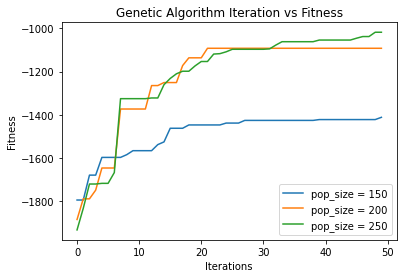

In [35]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Genetic Algorithm Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [36]:
#RCH RESTARTS=0
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=0, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.016974449157714844
[19  1 18 13  4  7 14 15 17 12  8 16  5  6  2 10 11  3  0  9]
1553.8485748197345


In [37]:
#RCH RESTARTS=10
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=10, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.09409546852111816
[ 0  1  6 18  2 11 12  8 13  5 10  4  7  3  9 14 15 17 16 19]
1294.5758810877903


In [38]:
curve_RHC = fitness_curve_pro
fitness_RHC = best_fitness

In [39]:
#RCH RESTARTS=5
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=5, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.07388114929199219
[16  1  6 18 10  4  7  9 15 14 17  0  8  2 13 12 11  5  3 19]
1490.2402730173283


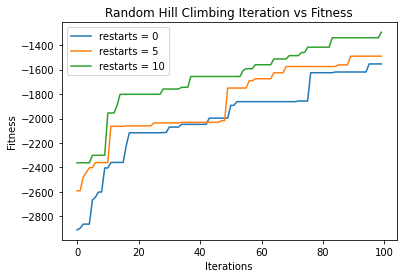

In [40]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='restarts = 5')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='restarts = 10')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Random Hill Climbing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [41]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.05560898780822754
[10  2 13 18  6  1  8 17 15 14 16  0 19  9  7  4  3 12  5 11]
1115.6508984566628


In [42]:
#SA schedule = arithdecay
start = time.time()
schedule = mlrose_hiive.ArithDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, schedule=schedule, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.03521537780761719
[ 9  3  5 13 11  7  4 10  2 12 16 19 17 14 15 18  6  1  8  0]
1406.3287627721857


In [43]:
#SA schedule = expdecay
start = time.time()
schedule = mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, schedule=schedule, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.050557851791381836
[ 5  1  6 18 16 15 14 17  7  4  3  9 19  0  8 12 11 10  2 13]
1143.5347708010033


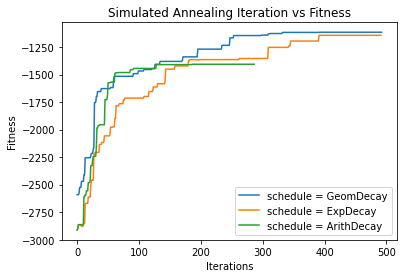

In [44]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='schedule = GeomDecay')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='schedule = ExpDecay')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='schedule = ArithDecay')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [45]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.048011064529418945
[10  2 13 18  6  1  8 17 15 14 16  0 19  9  7  4  3 12  5 11]
1115.6508984566628


In [46]:
#SA schedule = geomdecay decay 0.75
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.75, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.03151559829711914
[ 9  3  5 13 11  7  4 10  2 12 16 19 17 14 15 18  6  1  8  0]
1406.3287627721857


In [47]:
#SA schedule = geomdecay decay 0.55
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.55, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.035035133361816406
[18  3  0  9 14 15 16  6  1  8 19 17  7  4 10 13  5 12 11  2]
1553.9887849175198


In [48]:
#SA schedule = geomdecay decay 0.35
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.35, min_temp=1)
best_state, best_fitness, fitness_curve_pro3 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=4)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.03833627700805664
[12  1  6 18 13  5  0 17 14 15  2 10 11  4  7  3  9 19 16  8]
1240.1590830980165


In [49]:
#SA schedule = geomdecay decay 0.15
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.15, min_temp=1)
best_state, best_fitness, fitness_curve_pro4 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=5)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.039217472076416016
[ 9 19  8  1  6 18  2 10 13 11  4  7  3  5 12  0 16 15 14 17]
1108.233832528548


In [50]:
curve_SA = fitness_curve_pro4
fitness_SA = best_fitness

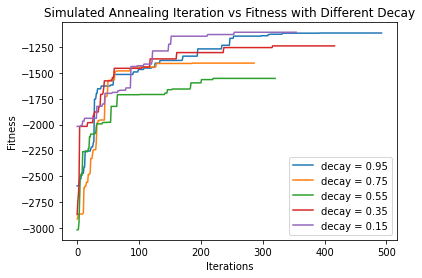

In [51]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='decay = 0.75')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='decay = 0.55')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro3))), -fitness_curve_pro3[:,0], label='decay = 0.35')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro4))), -fitness_curve_pro4[:,0], label='decay = 0.15')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness with Different Decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [52]:
#MIMIC POPSIZE = 200
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

30.15898299217224
[ 5  2  4  7  9  0 16 18  6  1 12  8 10 11 13 17 19  3 15 14]
1788.3050874468904


In [53]:
#MIMIC POPSIZE = 250
start = time.time()
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.mimic(problem_fit, pop_size=250, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

31.594808340072632
[17 16 19  7  4  8 11  0 12 18 10  1  6  2 13  5  9  3 15 14]
1665.7099988756042


In [54]:
#MIMIC POPSIZE = 150
start = time.time()
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.mimic(problem_fit, pop_size=150, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

23.017802953720093
[17  9  0 19  8 16 14 15  3 11 13  4 12  6 18  1  5 10  2  7]
1657.2134690981152


In [55]:
curve_MIMIC = fitness_curve_pro2
fitness_MIMIC = best_fitness

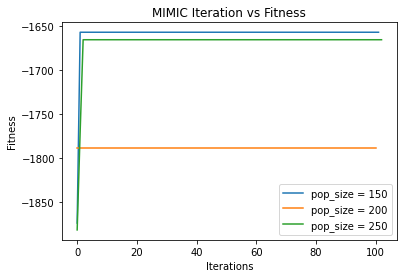

In [56]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), -fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), -fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), -fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("MIMIC Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

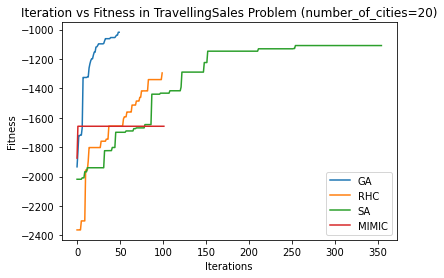

In [57]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(curve_GA))), -curve_GA[:,0], label='GA')  # ... and some more.
ax.plot(range(0,len(list(curve_RHC))), -curve_RHC[:,0], label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(curve_SA))), -curve_SA[:,0], label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(curve_MIMIC))), -curve_MIMIC[:,0], label='MIMIC')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Iteration vs Fitness in TravellingSales Problem (number_of_cities=20)")  # Add a title to the axes.
ax.legend()  # Add a legend.

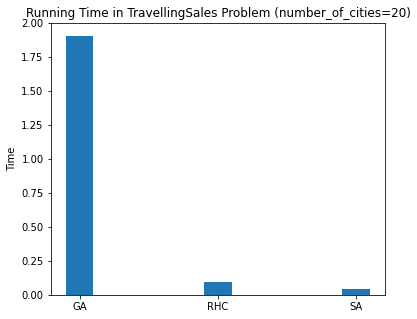

In [61]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA'] 
runtime_list = [1.906679391860962,0.09633803367614746,0.04432058334350586]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Time")
plt.title("Running Time in TravellingSales Problem (number_of_cities=20)")
plt.show()

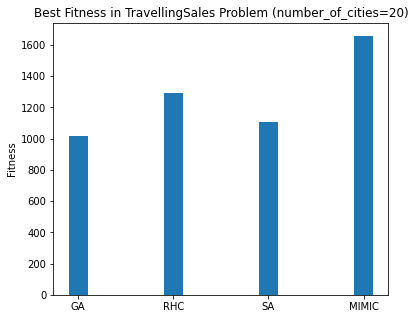

In [63]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA','MIMIC'] 
runtime_list = [fitness_GA,fitness_RHC,fitness_SA,fitness_MIMIC]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Fitness")
plt.title("Best Fitness in TravellingSales Problem (number_of_cities=20)")
plt.show()